In [1]:
import sys
sys.path.append('/home/n31v/workspace/Fedot.Industrial')
import pandas as pd

from fedot_ind.core.architecture.postprocessing.cv_results_parser import *
from utils import *

ds_name = 'Food101'
exp_root = '/media/n31v/data/results/' + ds_name

In [3]:
exps = exp_list(ds_name, add_mean=False)
exps.pop('SFP energy')
exps['SFP percentage'] = {k: v for k,v in exps['SFP percentage'].items() if k in ['SFP 10%', 'SFP 30%', 'SFP 50%', 'SFP 70%']}
exps

{'Baseline': '/media/n31v/data/results/Food101/ResNet50',
 'SFP percentage': {'SFP 10%': '/media/n31v/data/results/Food101/ResNet50_SFP_pruning_ratio-0.1',
  'SFP 30%': '/media/n31v/data/results/Food101/ResNet50_SFP_pruning_ratio-0.3',
  'SFP 50%': '/media/n31v/data/results/Food101/ResNet50_SFP_pruning_ratio-0.5',
  'SFP 70%': '/media/n31v/data/results/Food101/ResNet50_SFP_pruning_ratio-0.7'},
 'SVD channel': {'Hoer 0.1 Ort 10': '/media/n31v/data/results/Food101/ResNet50_SVD_channel_O-10_H-0.1',
  'Hoer 0.1 Ort 100': '/media/n31v/data/results/Food101/ResNet50_SVD_channel_O-100_H-0.1',
  'Hoer 0.01 Ort 10': '/media/n31v/data/results/Food101/ResNet50_SVD_channel_O-10_H-0.01',
  'Hoer 0.01 Ort 100': '/media/n31v/data/results/Food101/ResNet50_SVD_channel_O-100_H-0.01',
  'Hoer 0.001 Ort 100': '/media/n31v/data/results/Food101/ResNet50_SVD_channel_O-100_H-0.001'},
 'SVD spatial': {'Hoer 0.1 Ort 10': '/media/n31v/data/results/Food101/ResNet50_SVD_spatial_O-10_H-0.1',
  'Hoer 0.1 Ort 100': '/

In [4]:
svd_channel = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD channel'],
    metric='f1'
)
svd_spatial = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD spatial'],
    metric='f1'
)
sfp_per = compare_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=exps['SFP percentage'],
    metric='f1'
)
best = get_best_metric(
    exp_path=exps['Baseline'],
    metric='f1'
)
print(f'best f1: {best:.3f}')

best f1: 0.680


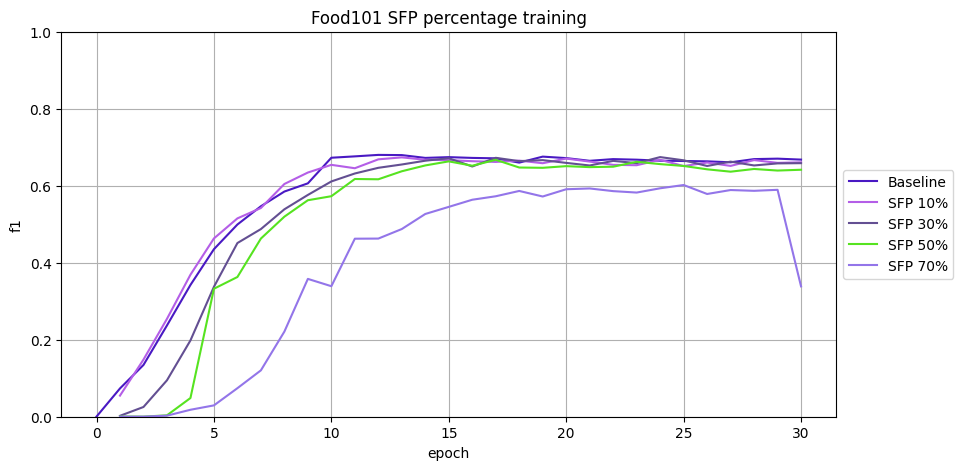

In [5]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SFP percentage'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    title=f'{ds_name} SFP percentage training',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

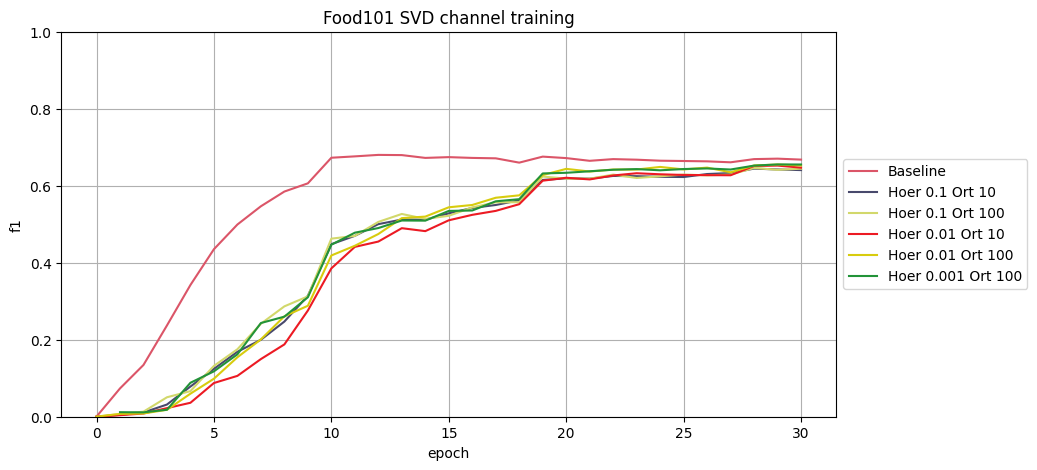

In [7]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD channel'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    title=f'{ds_name} SVD channel training',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

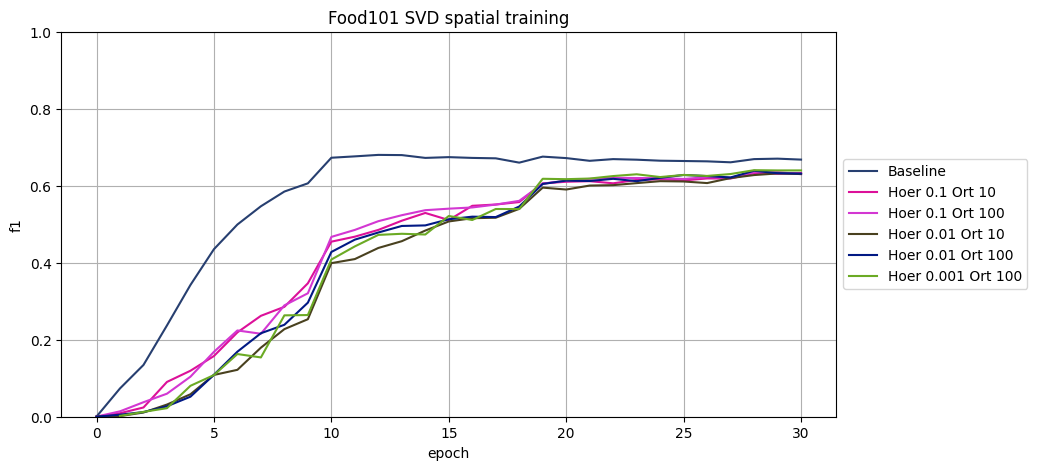

In [10]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD spatial'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    title=f'{ds_name} SVD spatial training',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

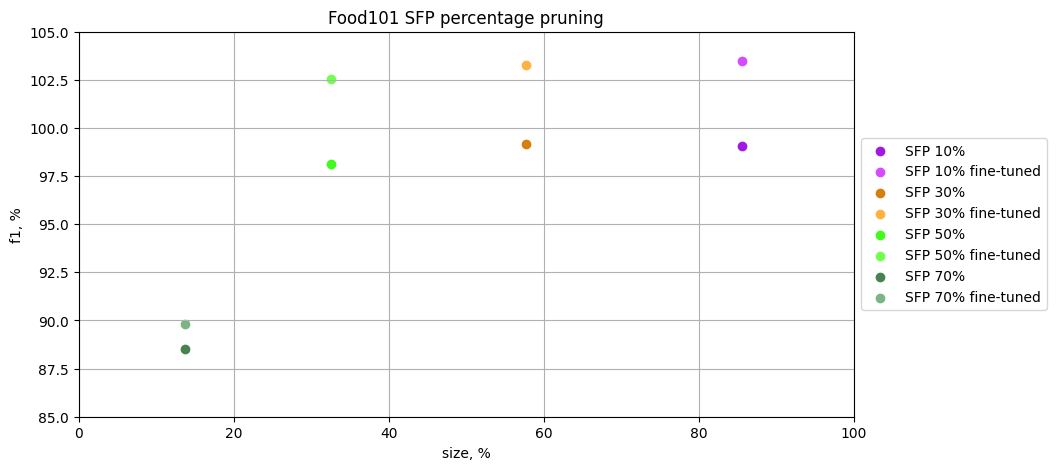

In [12]:
ax = show_sfp_results(
    sfp_exps=sfp_per,
    figsize=(10, 5),
    title=f'{ds_name} SFP percentage pruning',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(85, 105),
    xlim=(0, 100)
)

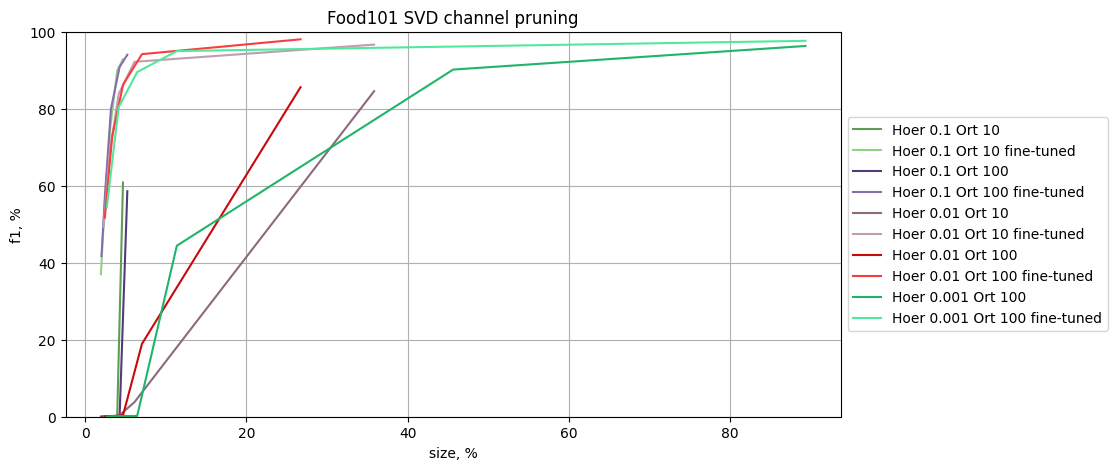

In [25]:
ax = show_svd_results(
    svd_exps=svd_channel,
    figsize=(10, 5),
    title=f'{ds_name} SVD channel pruning',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(80, 100),
    # xlim=(0, 100)
)

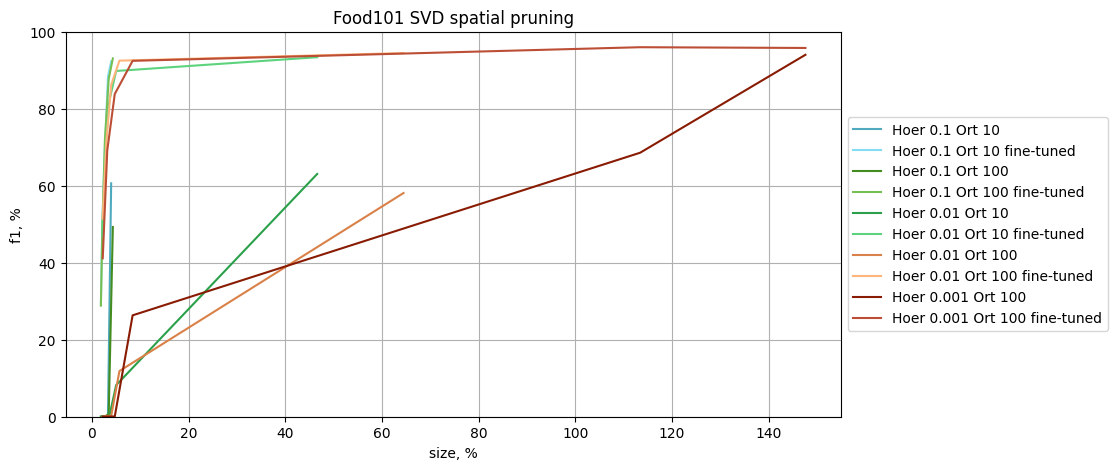

In [26]:
ax = show_svd_results(
    svd_exps=svd_spatial,
    figsize=(10, 5),
    title=f'{ds_name} SVD spatial pruning',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(80, 100),
    # xlim=(0, 100)
)

In [28]:
best_svd = dict(channel='Hoer 0.01 Ort 100', spatial='Hoer 0.01 Ort 100')
best_channel = svd_channel[best_svd['channel']]
best_spatial = svd_spatial[best_svd['spatial']]
compare_dict = {
    "SFP percentage": sfp_per,
    "SVD channel": best_channel,
    "SVD spatial": best_spatial
}

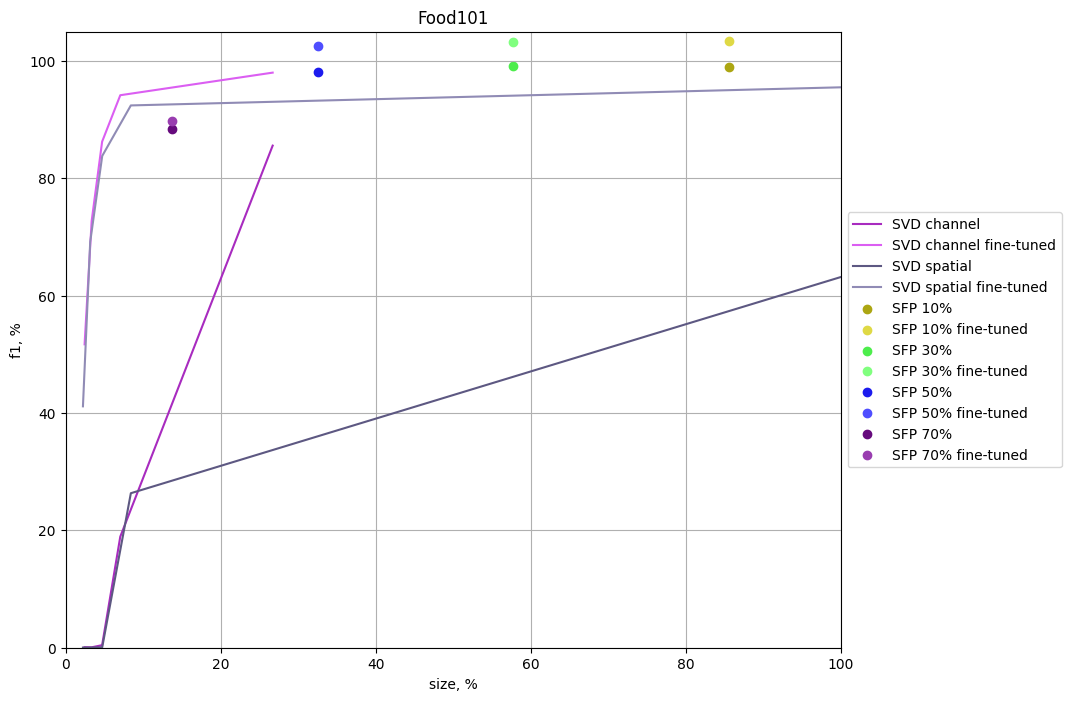

In [33]:
ax = show_svd_sfp_results(
    sfp_exps=sfp_per,
    svd_exps={
        'SVD channel': best_channel,
        'SVD spatial': best_spatial,
    },
    figsize=(10, 8),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 105),
    xlim=(0, 100)
)

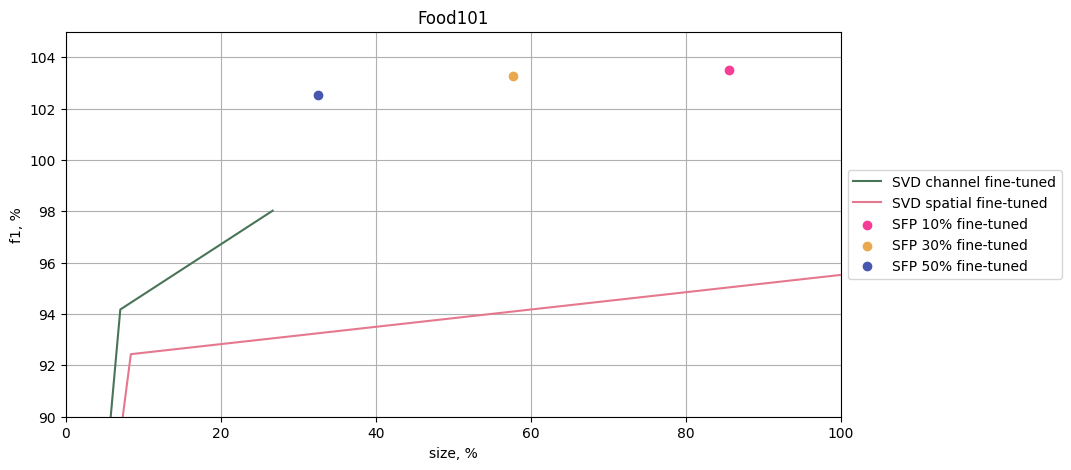

In [37]:
max_size = 100
min_f1 = 90
ax = show_svd_sfp_results(
    sfp_exps=sfp_per.loc[sfp_per['size']<max_size].loc[sfp_per['fine-tuned']>min_f1][['size', 'fine-tuned']],
    svd_exps={
        'SVD channel': best_channel[['size', 'fine-tuned']],
        'SVD spatial': best_spatial[['size', 'fine-tuned']],
    },
    figsize=(10, 5),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(min_f1, 105),
    xlim=(0, max_size)
)

In [38]:
results = {}
for percent in [100, 99, 97]:
    for phase in ['pruned', 'fine-tuned']:
        results[f'{percent}% {phase}'] = {}
        for k, v in compare_dict.items():
            tmp = v.loc[v[phase]>=percent]['size']
            results[f'{percent}% {phase}'][k] = f"{tmp.min():.0f} ({tmp.idxmin() if len(tmp)>0 else ''})"
results = pd.DataFrame(results).T
results

,SFP percentage,SVD channel,SVD spatial
100% pruned,nan (),nan (),nan ()
100% fine-tuned,33 (SFP 50%),nan (),nan ()
99% pruned,58 (SFP 30%),nan (),nan ()
99% fine-tuned,33 (SFP 50%),nan (),nan ()
97% pruned,33 (SFP 50%),nan (),nan ()
97% fine-tuned,33 (SFP 50%),27 (e_0.99),nan ()


## FLOP

In [ ]:
compare_df = compare_inference(
    dataset_name=ds_name,
    exps=exps,
    percent=97,
    compare_dict=compare_dict,
    best_svd=best_svd,
)
compare_df

In [ ]:
compare_df.iloc[:, 4:]

In [ ]:
compare_df.iloc[:, 4:].T.plot(kind='barh', title=ds_name).legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
final_compare_df = compare_df.loc[['Baseline', 'SFP percentage', 'SFP energy'], ['flop, %', 'size, %']]
final_compare_df.loc['SVD channel', :] =  compare_df.loc['SVD channel two_layers', ['flop, %', 'size, %']]
final_compare_df.loc['SVD spatial', :] =  compare_df.loc['SVD spatial two_layers', ['flop, %', 'size, %']]
final_compare_df.T.plot(kind='bar', title=f'{ds_name}, f1 > 98 %', figsize=(5, 7));